In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime


# 1.Data Collection


In [9]:
now = datetime.now()
start = datetime(now.year - 10, now.month, now.day)
end = now
ticker = 'AAPL'
df = yf.download(ticker, start=start, end=end)
df

C:\Users\manju\AppData\Local\Temp\ipykernel_24232\2333389743.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-07-17,29.030577,29.030577,28.737181,28.909636,184658800
2015-07-20,29.579302,29.780871,29.272465,29.332937,235600800
2015-07-21,29.283672,29.769680,29.187368,29.754004,307025600
2015-07-22,28.045130,28.107840,27.321716,27.321716,461802400
2015-07-23,28.031694,28.463949,28.009296,28.264618,203998000
...,...,...,...,...,...
2025-07-11,211.160004,212.130005,209.860001,210.570007,39765800
2025-07-14,208.619995,210.910004,207.539993,209.929993,38840100


In [10]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-07-17,29.030577,29.030577,28.737181,28.909636,184658800
2015-07-20,29.579302,29.780871,29.272465,29.332937,235600800
2015-07-21,29.283672,29.769680,29.187368,29.754004,307025600
2015-07-22,28.045130,28.107840,27.321716,27.321716,461802400
2015-07-23,28.031694,28.463949,28.009296,28.264618,203998000


In [11]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-07-11,211.160004,212.130005,209.860001,210.570007,39765800
2025-07-14,208.619995,210.910004,207.539993,209.929993,38840100
2025-07-15,209.110001,211.889999,208.919998,209.220001,42296300
2025-07-16,210.160004,212.399994,208.639999,210.300003,47429600
2025-07-17,211.610001,211.800003,209.589996,210.625000,28197499


# 2. Data Exploration & Visualization

In [12]:

type(df)

pandas.core.frame.DataFrame

In [13]:
df.shape

(2515, 5)

In [14]:
df.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [15]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,104.100111,105.143668,102.942812,103.998068,1.092218e+08
std,69.067177,69.741745,68.301537,68.987669,6.430864e+07
min,20.647457,20.951437,20.448617,20.569754,2.323470e+07
25%,39.369678,39.879286,38.886660,39.310928,6.629105e+07
50%,92.679497,93.299204,91.148496,91.731736,9.407120e+07
75%,164.681091,166.521892,163.286668,164.695455,1.329670e+08
max,258.396667,259.474086,257.010028,257.568678,6.488252e+08


In [16]:
df = df.reset_index()

In [17]:

df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-07-17,29.030577,29.030577,28.737181,28.909636,184658800
1,2015-07-20,29.579302,29.780871,29.272465,29.332937,235600800
2,2015-07-21,29.283672,29.769680,29.187368,29.754004,307025600
3,2015-07-22,28.045130,28.107840,27.321716,27.321716,461802400
4,2015-07-23,28.031694,28.463949,28.009296,28.264618,203998000


Text(0, 0.5, 'Close price')

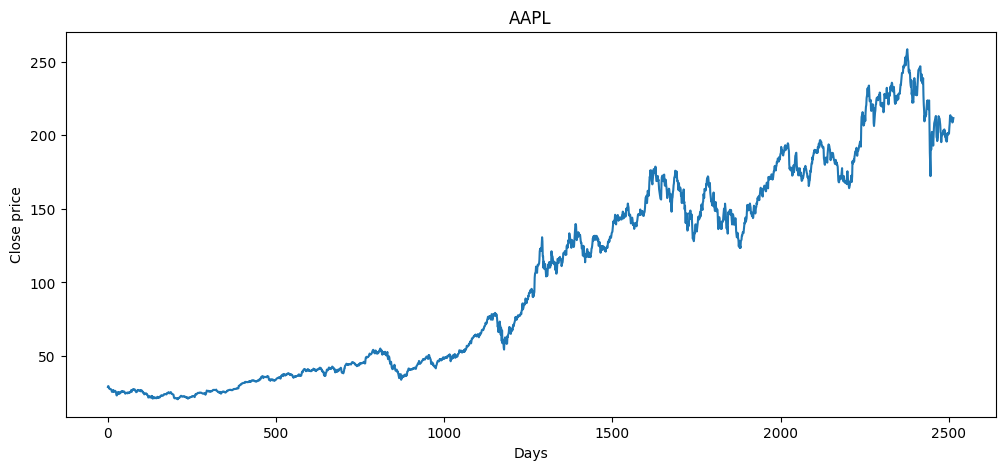

In [18]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close price')

# 3. Feature Engineering

In [19]:
temp_df = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_df[2:7])/5)

50.0


In [20]:
df1 = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
df1

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [21]:
df1['MA_5'] = df1.rolling(5).mean()
df1

,0,MA_5
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [22]:
df['MA_100'] = df.Close.rolling(100).mean()
df.head()

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-07-17,29.030577,29.030577,28.737181,28.909636,184658800,NaN
1,2015-07-20,29.579302,29.780871,29.272465,29.332937,235600800,NaN
2,2015-07-21,29.283672,29.769680,29.187368,29.754004,307025600,NaN
3,2015-07-22,28.045130,28.107840,27.321716,27.321716,461802400,NaN
4,2015-07-23,28.031694,28.463949,28.009296,28.264618,203998000,NaN


In [23]:
df.head(103)

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-07-17,29.030577,29.030577,28.737181,28.909636,184658800,NaN
1,2015-07-20,29.579302,29.780871,29.272465,29.332937,235600800,NaN
2,2015-07-21,29.283672,29.769680,29.187368,29.754004,307025600,NaN
3,2015-07-22,28.045130,28.107840,27.321716,27.321716,461802400,NaN
4,2015-07-23,28.031694,28.463949,28.009296,28.264618,203998000,NaN
...,...,...,...,...,...,...,...
98,2015-12-04,26.894073,26.943781,26.008375,26.049045,231108000,NaN
99,2015-12-07,26.724619,27.081610,26.618425,26.882781,128336800,26.045420
100,2015-12-08,26.713322,26.796920,26.403778,26.552900,137238000,26.022248


Text(0, 0.5, 'Price')

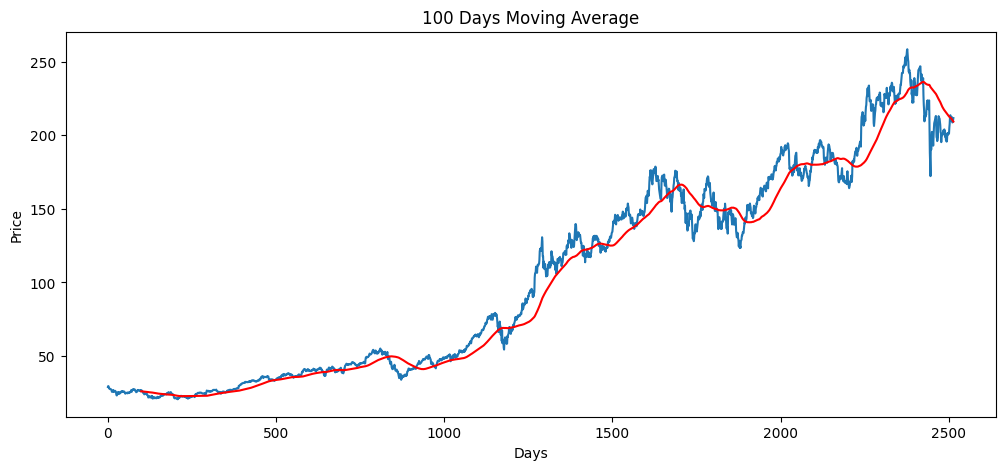

In [24]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r')
plt.title('100 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Price')

In [25]:

df['MA_200'] = df.Close.rolling(200).mean()
df.head(203)

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-07-17,29.030577,29.030577,28.737181,28.909636,184658800,NaN,NaN
1,2015-07-20,29.579302,29.780871,29.272465,29.332937,235600800,NaN,NaN
2,2015-07-21,29.283672,29.769680,29.187368,29.754004,307025600,NaN,NaN
3,2015-07-22,28.045130,28.107840,27.321716,27.321716,461802400,NaN,NaN
4,2015-07-23,28.031694,28.463949,28.009296,28.264618,203998000,NaN,NaN
...,...,...,...,...,...,...,...,...
198,2016-04-29,21.294889,21.517517,21.015472,21.351682,274126000,23.371751,NaN
199,2016-05-02,21.272175,21.372130,20.990485,21.347141,192640400,23.317227,24.681323
200,2016-05-03,21.622007,21.749222,21.281253,21.399380,227325200,23.266313,24.644281


Text(0, 0.5, 'Price')

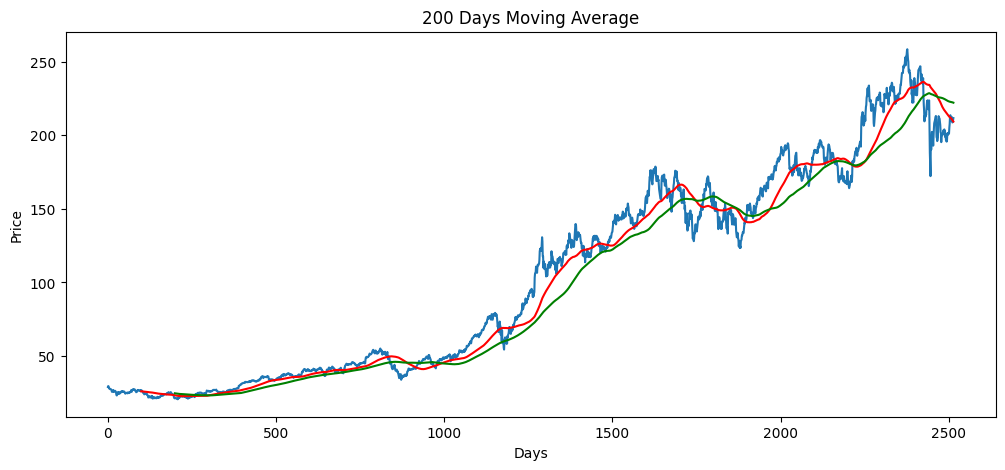

In [26]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r')
plt.plot(df['MA_200'], 'g')
plt.title('200 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Price')

In [27]:
df['Percentage Chaged'] = df.Close.pct_change()
df[['Close', 'Percentage Chaged']]

Price,Close,Percentage Chaged
Ticker,AAPL,
0,29.030577,NaN
1,29.579302,0.018902
2,29.283672,-0.009994
3,28.045130,-0.042295
4,28.031694,-0.000479
...,...,...
2510,211.160004,-0.005885
2511,208.619995,-0.012029
2512,209.110001,0.002349


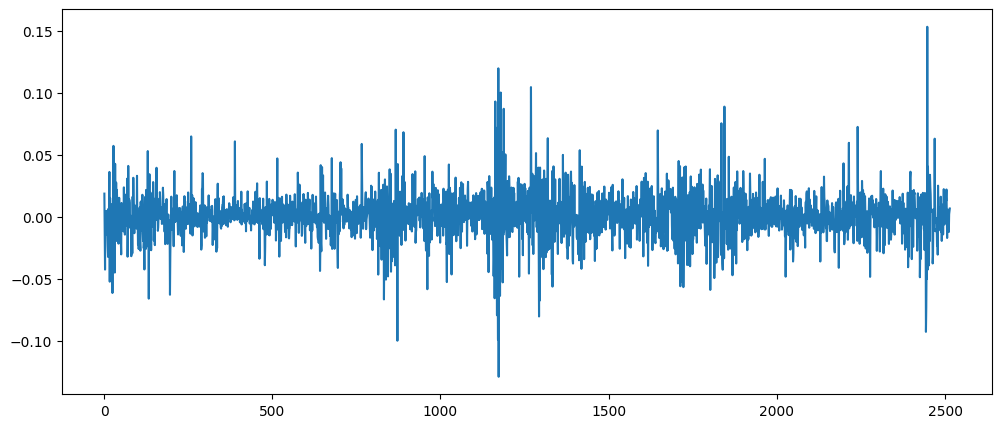

In [28]:
plt.figure(figsize=(12, 5))
plt.plot(df['Percentage Chaged'])

# 4. Data Preprocessing

In [29]:
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7): int(len(df))])

print(data_training)
print(data_testing)

Ticker        AAPL
0        29.030577
1        29.579302
2        29.283672
3        28.045130
4        28.031694
...            ...
1755    144.039139
1756    144.718262
1757    142.582504
1758    143.556870
1759    143.192719

[1760 rows x 1 columns]
Ticker        AAPL
1760    146.125656
1761    147.798813
1762    144.747757
1763    148.615723
1764    150.623489
...            ...
2510    211.160004
2511    208.619995
2512    209.110001
2513    210.160004
2514    211.610001

[755 rows x 1 columns]


In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [31]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.05305833],
       [0.05653132],
       [0.05466022],
       ...,
       [0.77174973],
       [0.77791667],
       [0.77561189]])

In [32]:
data_training_array.shape

(1760, 1)

# 5. Sequence Creation

In [33]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])


x_train, y_train = np.array(x_train), np.array(y_train)

In [34]:
x_train

array([[[0.05305833],
        [0.05653132],
        [0.05466022],
        ...,
        [0.03405894],
        [0.039536  ],
        [0.03846349]],

       [[0.05653132],
        [0.05466022],
        [0.04682125],
        ...,
        [0.039536  ],
        [0.03846349],
        [0.03839199]],

       [[0.05466022],
        [0.04682125],
        [0.04673622],
        ...,
        [0.03846349],
        [0.03839199],
        [0.03465958]],

       ...,

       [[0.91977077],
        [0.94409134],
        [0.94259838],
        ...,
        [0.75960263],
        [0.78096904],
        [0.78526734]],

       [[0.94409134],
        [0.94259838],
        [0.91977077],
        ...,
        [0.78096904],
        [0.78526734],
        [0.77174973]],

       [[0.94259838],
        [0.91977077],
        [0.90994274],
        ...,
        [0.78526734],
        [0.77174973],
        [0.77791667]]])

In [35]:
y_train

array([0.03839199, 0.03465958, 0.03544608, ..., 0.77174973, 0.77791667,
       0.77561189])

In [36]:
x_train.shape

(1660, 100, 1)

In [37]:
y_train.shape

(1660,)

# 6. Model Building

In [38]:
import tensorflow as tf
print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.19.0


In [39]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [40]:
model = Sequential()

model.add(Input(shape=(100, 1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

# 7. Model Training

In [ ]:

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 193ms/step - loss: 0.0208
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 164ms/step - loss: 5.5723e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 154ms/step - loss: 4.5957e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 210ms/step - loss: 4.9856e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 207ms/step - loss: 5.3602e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 234ms/step - loss: 4.3981e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 227ms/step - loss: 4.4783e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 204ms/step - loss: 4.8969e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 242ms/step - loss: 3.8745e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 225ms/step - loss: 3.3107e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 201ms/step - loss: 4.2883e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 205ms/step - loss: 3.9957e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 159ms/step - loss: 3.3113e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 149ms/step - loss: 3.2056

In [ ]:
model.summary()

In [ ]:
model.save('stock_prediction_model.keras')

# 8. Preparing Test Data

In [ ]:
data_training.tail(100)

In [ ]:
data_testing

In [ ]:
past_100_days = data_training.tail(100)
past_100_days

In [ ]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df

In [ ]:
input_data = scaler.fit_transform(final_df)
# input_data
input_data.shape

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [ ]:
x_test[0].shape

In [ ]:
x_test

# 9. Making Predictions

In [ ]:
y_predicted = model.predict(x_test)

In [ ]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.xlim(450, 750)
plt.ylim(140, 220)

# 10. Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_predicted)
print(f"Mean Squared Error (MSE): {mse}")
Mean Squared Error (MSE): 10.58892854531833
 
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
Root Mean Squared Error (RMSE): 3.2540633898740094
 
# R-Squared
r2 = r2_score(y_test, y_predicted)
print(f"R-Squared: {r2}")